# Análisis exploratorio de datos (EDA)

El objetivo de este análisis exploratorio de datos (EDA) es identificar patrones que puedan ayudar a definir el perfil de un adoptante ideal y las condiciones que favorecen una adopción exitosa.

#### Índice del análisis exploratorio
##### 1. Visión general
-  1.1. Distribución por tipo de animal adoptado
-  1.2. Evolución anual de adopciones (2010–2025)
-  1.3. Estacionalidad mensual de adopciones

##### 2. Perfil del adoptante
-  2.1. Género del adoptante y adopción exitosa
-  2.2. Edad del adoptante (rango) y adopción exitosa
-  2.3. Experiencia con animales y adopciones exitosas

##### 3. Condiciones del hogar
-  3.1. Tipo de vivienda y adopciones exitosas
-  3.2. Tiempo disponible
-  3.3. Horario laboral y adopciones exitosas
-  3.4. Relación entre tiempo disponible y tipo de animal (heatmap)




In [ ]:
# Montar Google Drive

from google.colab import drive
drive.mount('/content/drive')

# Cargar dataset

import pandas as pd
import matplotlib.pyplot as plt

# Ruta al archivo en tu Google Drive
ruta = '/content/drive/MyDrive/Dataset_TFM/datos_adopciones_limpio_test.xlsx'

# Cargar el dataset
df = pd.read_excel(ruta)

Mounted at /content/drive


## 1. Visión general

In [ ]:
# Dimensiones del dataset
filas, columnas = df.shape
print(f"El dataset tiene {filas} filas y {columnas} columnas.")

El dataset tiene 2319 filas y 17 columnas.


In [ ]:
# Variables categóricas a analizar
categorical_vars = [
    "tipo_animal",
    "genero",
    "vivienda",
    "experiencia_animales",
    "horario_laboral",
    "tiempo_disponible"
]

# Tablas de frequencias (%)

for var in categorical_vars:
    print("=" * 50)
    print(f"Distribución de {var.upper()}")
    print("-" * 50)
    print(df[var].value_counts(normalize=True).round(3) * 100)
    print("\n")



Distribución de TIPO_ANIMAL
--------------------------------------------------
tipo_animal
perro    93.7
gato      6.3
Name: proportion, dtype: float64


Distribución de GENERO
--------------------------------------------------
genero
Mujer     52.9
Hombre    45.0
Otro       2.1
Name: proportion, dtype: float64


Distribución de VIVIENDA
--------------------------------------------------
vivienda
Piso                   57.7
Casa/Chalet            23.8
Atico                  10.8
Vivienda compartida     7.7
Name: proportion, dtype: float64


Distribución de EXPERIENCIA_ANIMALES
--------------------------------------------------
experiencia_animales
Media    41.2
Alta     36.7
Baja     22.0
baja      0.0
Name: proportion, dtype: float64


Distribución de HORARIO_LABORAL
--------------------------------------------------
horario_laboral
Jornada Completa            59.3
Turno Rotativo              13.9
Jornada Parcial (Tarde)     11.3
Jornada Parcial (Manana)     9.6
Sin Empleo            

### 1.1. Distribución por tipo de animal adoptado

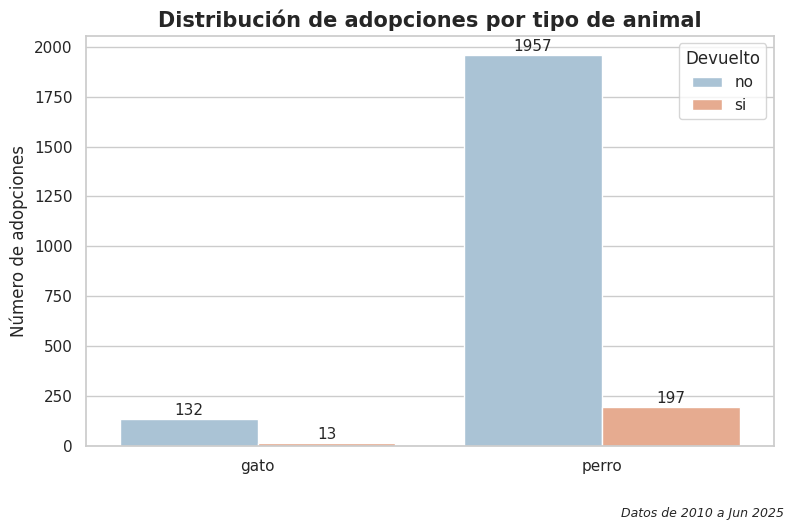

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Usar sólo adopciones y devoluciones (excl. 'otro')
df_plot = df[df['devuelto'].isin(['si', 'no'])]

sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

# Paleta solo para 'si' y 'no'
palette = {"no": "#A3C4DC", "si": "#F4A582"}

ax = sns.countplot(
    data=df_plot,
    x='tipo_animal',
    hue='devuelto',
    order=sorted(df_plot['tipo_animal'].unique()),
    palette=palette
)

# Añadir etiquetas encima de cada barra
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 5,
            int(height),
            ha='center',
            va='bottom',
            fontsize=11
        )

plt.title("Distribución de adopciones por tipo de animal", fontsize=15, weight='bold')
plt.xlabel("")
plt.ylabel("Número de adopciones")
plt.legend(title="Devuelto")

# Nota indicando el rango temporal
plt.figtext(
    0.99,          # posición X (al final)
    -0.05,         # posición Y (debajo de la figura)
    "Datos de 2010 a Jun 2025",
    ha="right",
    fontsize=9,
    style="italic"
)

plt.tight_layout()
plt.savefig("adopciones_tipo_animal.png", dpi=150, bbox_inches="tight")
plt.show()

### 1.2. Evolución anual de adopciones (2010–2025)

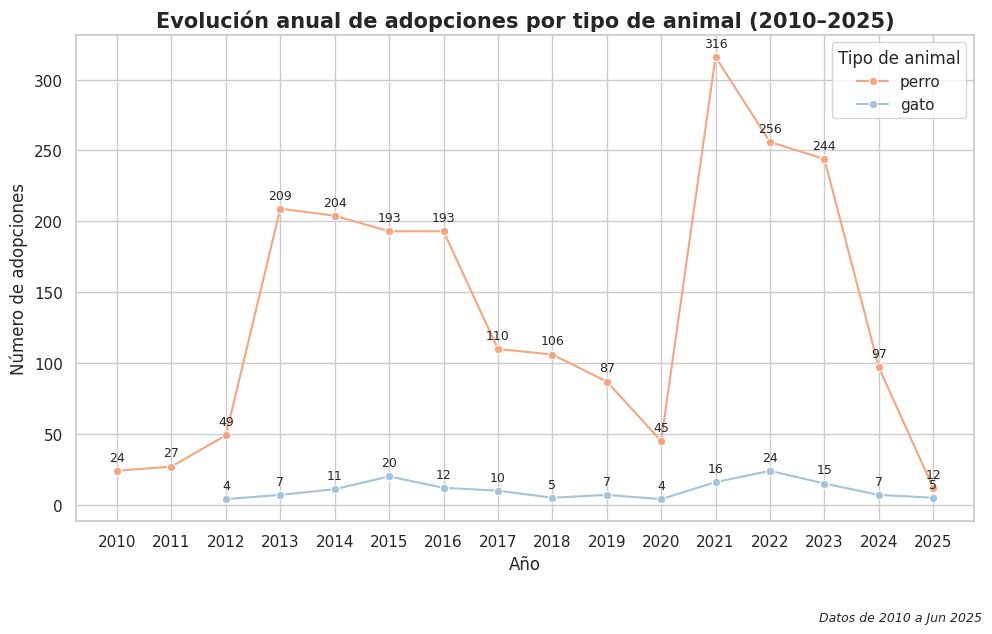

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar el rango temporal (2010–2025)
df_year = df[(df['año'] >= 2010) & (df['año'] <= 2025)]

# Agrupar por año y tipo de animal
evolucion = (
    df_year
    .groupby(['año', 'tipo_animal'])
    .size()
    .reset_index(name='n_adopciones')
    .sort_values('año')
)

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
palette = {'gato': '#A3C4DC', 'perro': '#F4A582'}

ax = sns.lineplot(
    data=evolucion,
    x='año',
    y='n_adopciones',
    hue='tipo_animal',
    marker='o',
    palette=palette
)

# Anotar cada punto con su conteo
for line in ax.lines:
    for x_data, y_data in zip(line.get_xdata(), line.get_ydata()):
        ax.text(
            x_data,
            y_data + 5,
            f"{int(y_data)}",
            ha='center',
            va='bottom',
            fontsize=9
        )

# Ajustes de estilo
plt.title("Evolución anual de adopciones por tipo de animal (2010–2025)", fontsize=15, weight='bold')
plt.xlabel("Año")
plt.ylabel("Número de adopciones")
plt.xticks(range(2010, 2026))
plt.legend(title="Tipo de animal")
plt.figtext(
    0.99,
    -0.05,
    "Datos de 2010 a Jun 2025",
    ha="right",
    fontsize=9,
    style="italic"
)
plt.tight_layout()
plt.savefig("evolucion_anual_adopciones_tipo_de_animal.png", dpi=150, bbox_inches="tight")

### 1.3. Estacionalidad mensual de adopciones (2010–2025)

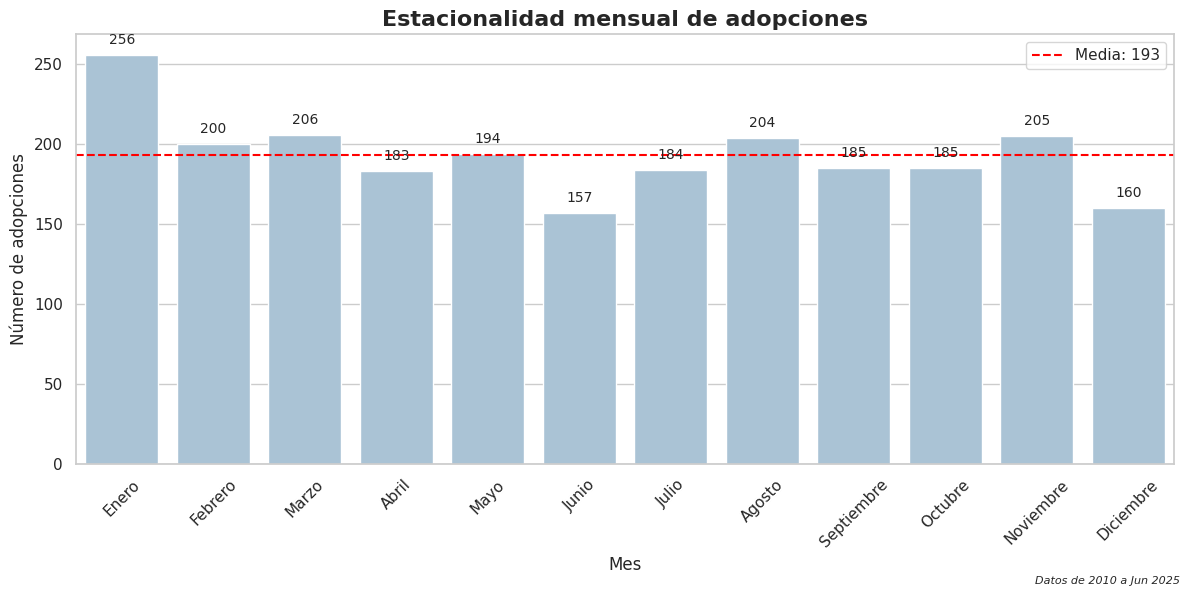

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar los años (2010–2025)
df_viz = df[df['año'].between(2010, 2025)].copy()

# Mapear de número de mes a nombre en español
meses_es = {
    1: "Enero", 2: "Febrero", 3: "Marzo", 4: "Abril", 5: "Mayo", 6: "Junio",
    7: "Julio", 8: "Agosto", 9: "Septiembre", 10: "Octubre", 11: "Noviembre", 12: "Diciembre"
}

# Crear columna 'mes' y agrupar por mes para contar las adopciones
df_viz['mes'] = df_viz['fecha'].dt.month
adopciones_por_mes = (
    df_viz
    .groupby('mes')
    .size()
    .reset_index(name='n_adopciones')
)
# Añadir nombre del mes y ordenar por número de mes
adopciones_por_mes['mes_nombre'] = adopciones_por_mes['mes'].map(meses_es)
adopciones_por_mes = adopciones_por_mes.sort_values('mes')

# Calcular la media de adopciones mensuales
media_adopciones = adopciones_por_mes['n_adopciones'].mean()

# Configuración del estilo del gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=adopciones_por_mes,
    x='mes_nombre',
    y='n_adopciones',
    color="#A3C4DC",
    order=[meses_es[m] for m in range(1, 13)]
)

# Anotar valores encima de cada barra usando las posiciones de Matplotlib
for p in ax.patches:
    altura = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = altura + 5
    ax.text(
        x, y,
        int(altura),
        ha='center',
        va='bottom',
        fontsize=10
    )

# Dibujar la línea de la media
line = plt.axhline(media_adopciones, color='red', linestyle='--', linewidth=1.5)
plt.legend([line], [f"Media: {int(media_adopciones)}"], loc="upper right")

# Etiquetas y título
plt.title("Estacionalidad mensual de adopciones", fontsize=16, weight='bold')
plt.xlabel("Mes")
plt.ylabel("Número de adopciones")
plt.xticks(rotation=45)

# Nota sobre el rango temporal

plt.figtext(0.99, 0.01, "Datos de 2010 a Jun 2025",
            ha="right", va="bottom", fontsize=8, style="italic")

# Ajustar la distribución de los elementos y guardar la figura
plt.tight_layout()
plt.savefig("estacionalidad_mensual.png", dpi=150, bbox_inches="tight")
plt.show()

## 2. Perfil del adoptante

Este apartado se centra en las características sociodemográficas de las personas adoptantes.

### 2.1. Género del adoptante y adopción exitosa

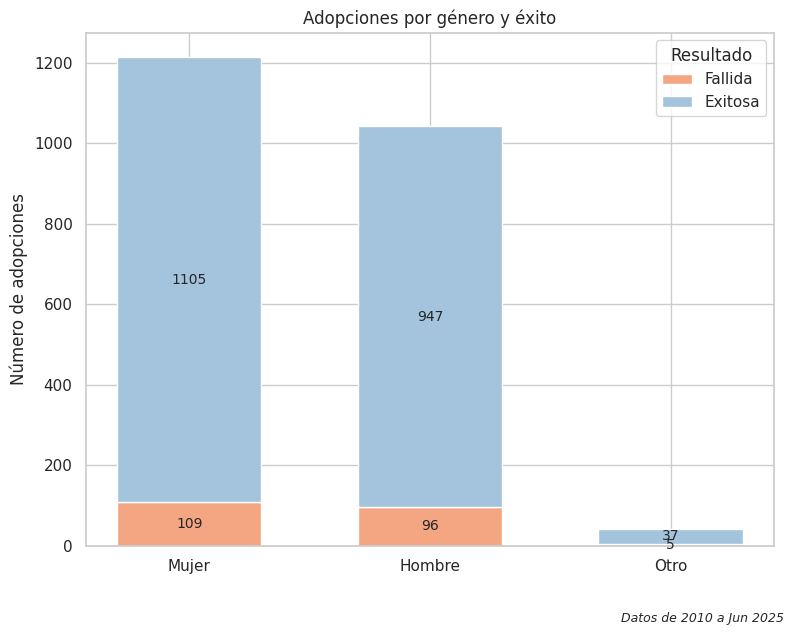

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Vista local sin 'otro'
df_plot = df[df['devuelto'].isin(['si', 'no'])].copy()
df_plot['Resultado'] = df_plot['devuelto'].map({'no': 'Exitosa', 'si': 'Fallida'})

# Orden y tabla de conteos
orden_genero = ['Mujer', 'Hombre', 'Otro']
conteos = (
    df_plot.groupby(['genero', 'Resultado'])
           .size()
           .unstack(fill_value=0)
           .reindex(orden_genero, fill_value=0)
)

# Gráfico apilado
labels = conteos.index.tolist()
x = np.arange(len(labels))
width = 0.6

plt.figure(figsize=(8, 6))
# Barra inferior: Fallida
b_f = plt.bar(x, conteos['Fallida'], width, label='Fallida', color="#F4A582")
# Barra superior: Exitosa
b_e = plt.bar(x, conteos['Exitosa'], width, bottom=conteos['Fallida'],
              label='Exitosa', color="#A3C4DC")

# Anotar cantidades en el centro de cada segmento
for i, genero in enumerate(labels):
    fallida = int(conteos.loc[genero, 'Fallida'])
    exitosa = int(conteos.loc[genero, 'Exitosa'])
    if fallida > 0:
        plt.text(x[i], fallida/2, f"{fallida}", ha='center', va='center', fontsize=10)
    if exitosa > 0:
        plt.text(x[i], fallida + exitosa/2, f"{exitosa}", ha='center', va='center', fontsize=10)

# Nota / ejes / título
plt.figtext(0.99, -0.05, "Datos de 2010 a Jun 2025", ha="right", fontsize=9, style="italic")
plt.xticks(x, labels)
plt.xlabel("")
plt.ylabel("Número de adopciones")
plt.title("Adopciones por género y éxito")
plt.legend(title="Resultado")
plt.tight_layout()
plt.savefig("adopciones_genero_exito.png", dpi=150, bbox_inches="tight")
plt.show()

### 2.2. Edad del adoptante (rango) y adopción exitosa

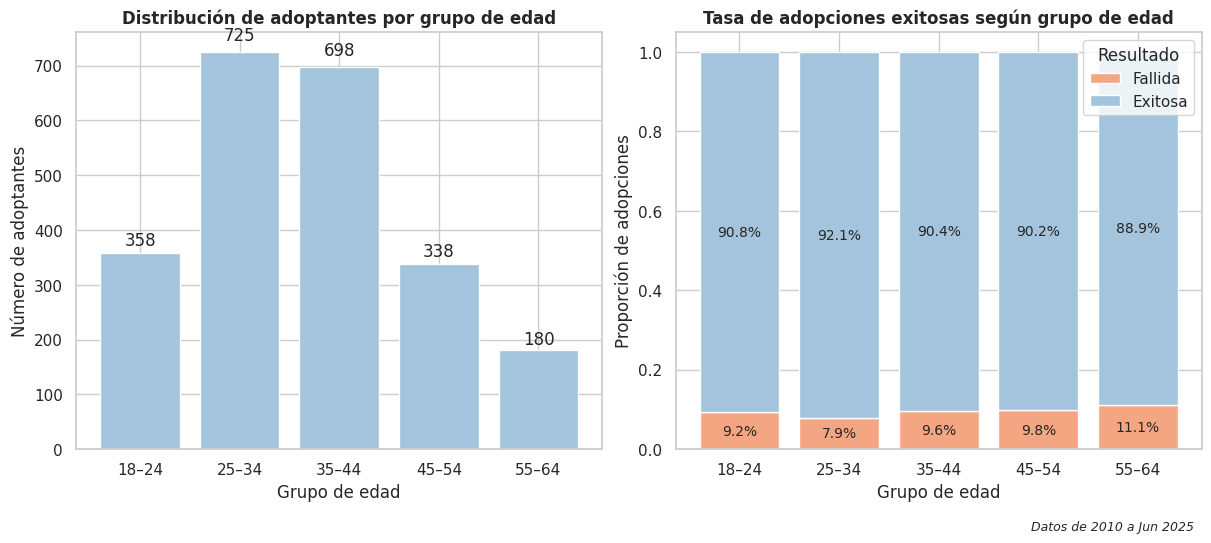

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
col_edad = 'grupo_edad'
orden_edades = ['18–24','25–34','35–44','45–54','55–64']

# Vista local: sólo adopciones y devoluciones (excluye 'otro')
df_plot = df[df['devuelto'].isin(['si', 'no'])].copy()

# Resultado (una sola vez, sin mutar df original)
df_plot['Resultado'] = df_plot['devuelto'].map({'no': 'Exitosa', 'si': 'Fallida'})

# Orden de grupos de edad (sin remapear, sólo ordenar)
df_plot[col_edad] = pd.Categorical(df_plot[col_edad], categories=orden_edades, ordered=True)

# Conteos absolutos por grupo de edad
conteos = (
    df_plot.groupby(col_edad, observed=False).size()
           .reindex(orden_edades, fill_value=0)
)

# Tabla de proporciones éxito/fallo por grupo de edad
tab = (
    df_plot.groupby([col_edad, 'Resultado'], observed=False).size()
           .unstack(fill_value=0)
           .reindex(orden_edades, fill_value=0)
)
# Asegurar columnas en orden
for c in ['Fallida', 'Exitosa']:
    if c not in tab.columns: tab[c] = 0
tab = tab[['Fallida', 'Exitosa']]
prop = (tab.T / tab.sum(axis=1).replace(0, np.nan)).T.fillna(0)

# Figura combinada
fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

# Panel 1: conteos absolutos
ax = axes[0]
bars = ax.bar(conteos.index.astype(str), conteos.values, color="#A3C4DC")
ax.set_title('Distribución de adoptantes por grupo de edad', fontsize=12, weight='bold')
ax.set_xlabel('Grupo de edad'); ax.set_ylabel('Número de adoptantes')
# Anotar usando posiciones reales de las barras
for b in bars:
    v = int(b.get_height())
    ax.text(b.get_x() + b.get_width()/2, v + max(1, v*0.02), f'{v}', ha='center', va='bottom')

# Panel 2: proporciones apiladas
ax2 = axes[1]
bottom = np.zeros(len(prop))
colors = {'Fallida': '#F4A582', 'Exitosa': '#A3C4DC'}
for col in ['Fallida','Exitosa']:
    vals = prop[col].values
    ax2.bar(prop.index.astype(str), vals, bottom=bottom, label=col, color=colors[col])
    for i, (b, v) in enumerate(zip(bottom, vals)):
        if v >= 0.015:
            ax2.text(i, b + v/2, f'{v*100:.1f}%', ha='center', va='center', fontsize=10)
    bottom += vals
ax2.set_title('Tasa de adopciones exitosas según grupo de edad', fontsize=12, weight='bold')
ax2.set_xlabel('Grupo de edad'); ax2.set_ylabel('Proporción de adopciones')
ax2.legend(title='Resultado')

# Nota de rango temporal
plt.figtext(0.99, -0.05, "Datos de 2010 a Jun 2025", ha="right", fontsize=9, style="italic")

plt.savefig('edad_conteo_y_proporcion_colores.png', dpi=150, bbox_inches="tight")
plt.show()

### 2.3. Experiencia con animales y adopciones exitosas

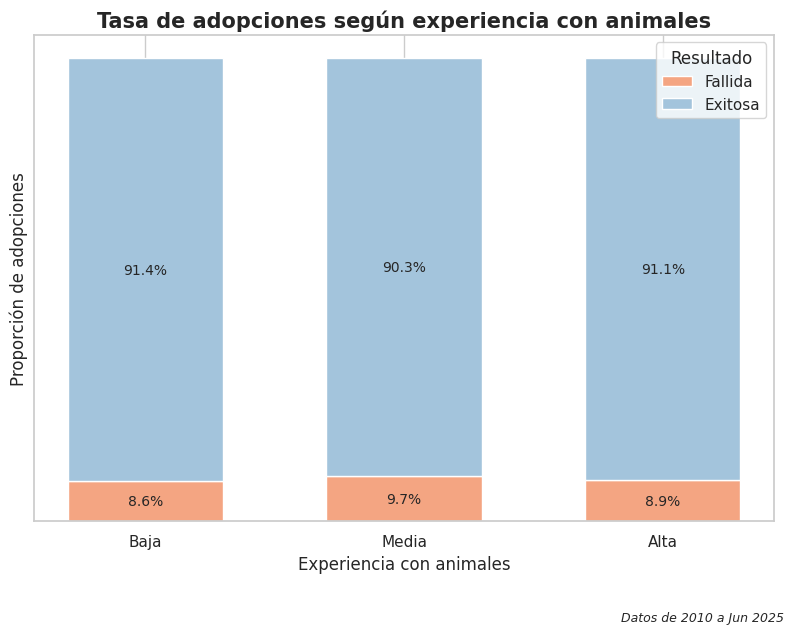

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Vista local: solo adopciones y devoluciones sin 'otro'
df_plot = df[df['devuelto'].isin(['si', 'no'])].copy()
df_plot['Resultado'] = df_plot['devuelto'].map({'no': 'Exitosa', 'si': 'Fallida'})

# Orden de experiencia
orden_exp = ['Baja', 'Media', 'Alta']

# Convertir a categórica
df_plot['experiencia_norm'] = pd.Categorical(df_plot['experiencia_animales'],
                                             categories=orden_exp,
                                             ordered=True)

# Crosstab
tabla = (
    pd.crosstab(df_plot['experiencia_norm'], df_plot['Resultado'])
      .reindex(orden_exp, fill_value=0)
)
for col in ['Fallida', 'Exitosa']:
    if col not in tabla.columns:
        tabla[col] = 0
tabla = tabla[['Fallida', 'Exitosa']]

# Proporciones
proporciones = tabla.div(tabla.sum(axis=1).replace(0, np.nan), axis=0).fillna(0)

# Gráfico
fig, ax = plt.subplots(figsize=(8, 6))
x = np.arange(len(orden_exp))
bottom = np.zeros(len(orden_exp))
colors = {'Fallida': '#F4A582', 'Exitosa': '#A3C4DC'}

for res in ['Fallida', 'Exitosa']:
    vals = proporciones[res].values
    ax.bar(x, vals, 0.6, bottom=bottom, label=res, color=colors[res])
    for i, (b, v) in enumerate(zip(bottom, vals)):
        if v > 0:
            ax.text(x[i], b + v/2, f"{v*100:.1f}%", ha='center', va='center', fontsize=10)
    bottom += vals

# Ajustes
ax.set_xticks(x)
ax.set_xticklabels(orden_exp)
ax.set_xlabel("Experiencia con animales")
ax.set_ylabel("Proporción de adopciones")
ax.set_title("Tasa de adopciones según experiencia con animales", fontsize=15, weight='bold')
ax.set_yticks([])
ax.legend(title="Resultado")

plt.figtext(0.99, -0.05, "Datos de 2010 a Jun 2025", ha="right", fontsize=9, style="italic")
plt.tight_layout()
plt.savefig("tasa_adopciones_experiencia.png", dpi=150, bbox_inches="tight")
plt.show()

## 3. Condiciones del hogar

Aquí se analizan factores prácticos del entorno del adoptante, como el tipo de vivienda, el tiempo disponible diario o el horario laboral.

### 3.1. Tipo de vivienda y adopciones exitosas

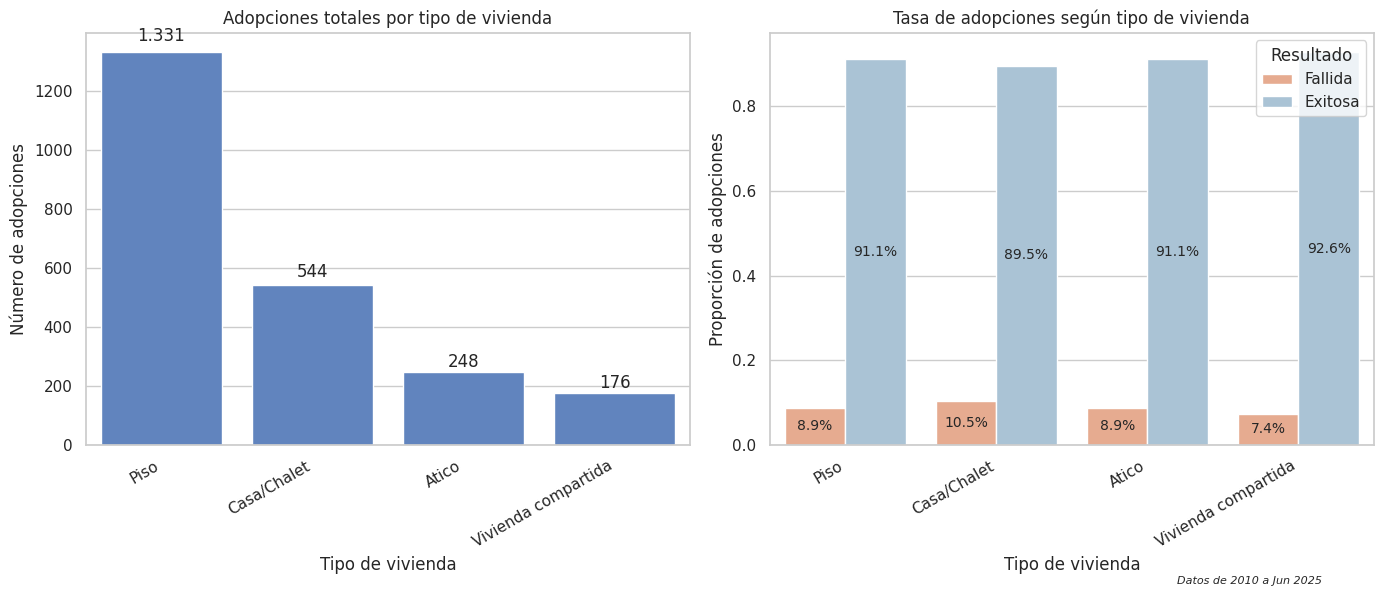

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Vista local: sólo adopciones y devoluciones sin 'otro'
df_plot = df[df['devuelto'].isin(['si', 'no'])].copy()
df_plot['Resultado'] = df_plot['devuelto'].map({'no': 'Exitosa', 'si': 'Fallida'})

# Orden de vivienda
orden_vivienda = ['Piso', 'Casa/Chalet', 'Atico', 'Vivienda compartida']

# Totales por vivienda
totales = df_plot['vivienda'].value_counts().reindex(orden_vivienda, fill_value=0)

# Tabla de éxito/devolución por vivienda
tabla = (
    pd.crosstab(df_plot['vivienda'], df_plot['Resultado'])
      .reindex(orden_vivienda, fill_value=0)
)
# Asegurar columnas
for c in ['Fallida', 'Exitosa']:
    if c not in tabla.columns:
        tabla[c] = 0
tabla = tabla[['Fallida', 'Exitosa']]

# Proporciones por vivienda
prop = tabla.div(tabla.sum(axis=1).replace(0, np.nan), axis=0).fillna(0)

# Preparar df apilado para el segundo gráfico
df_stacked = (
    prop.reset_index()
        .melt(id_vars='vivienda', value_vars=['Fallida','Exitosa'],
              var_name='Resultado', value_name='Proporción')
)

# Paletas
color_total = "#5181CD"
palette_resultado = {'Fallida':'#F4A582', 'Exitosa':'#A3C4DC'}

# Figura con dos subgráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Totales por tipo de vivienda
sns.barplot(x=totales.index, y=totales.values, color=color_total, ax=ax1, order=orden_vivienda)
ax1.set_title('Adopciones totales por tipo de vivienda')
ax1.set_xlabel('Tipo de vivienda'); ax1.set_ylabel('Número de adopciones')

# Etiquetas sobre cada barra
for b in ax1.patches:
    v = int(b.get_height())
    ax1.text(b.get_x() + b.get_width()/2, v + max(2, v*0.02), f'{v:,}'.replace(',', '.'),
             ha='center', va='bottom')

plt.setp(ax1.get_xticklabels(), rotation=30, ha='right')

# Barras apiladas proporcionales
sns.barplot(x='vivienda', y='Proporción', hue='Resultado',
            data=df_stacked, palette=palette_resultado, ax=ax2, order=orden_vivienda)
ax2.set_title('Tasa de adopciones según tipo de vivienda')
ax2.set_xlabel('Tipo de vivienda'); ax2.set_ylabel('Proporción de adopciones')

# Etiquetas de porcentaje dentro de cada barra
for cont in ax2.containers:
    etiquetas = [f'{v.get_height()*100:.1f}%' for v in cont]
    ax2.bar_label(cont, labels=etiquetas, label_type='center', fontsize=10)

ax2.legend(title='Resultado', loc='upper right')
plt.setp(ax2.get_xticklabels(), rotation=30, ha='right')

# Nota de rango temporal
fig.text(0.95, 0.01, 'Datos de 2010 a Jun 2025', ha='right', va='bottom', fontsize=8, style='italic')

plt.tight_layout()
plt.savefig("tipo_vivienda_tasa_adopcion.png", dpi=150, bbox_inches="tight")
plt.show()

plt.tight_layout()
plt.show()

### 3.2. Tiempo disponible

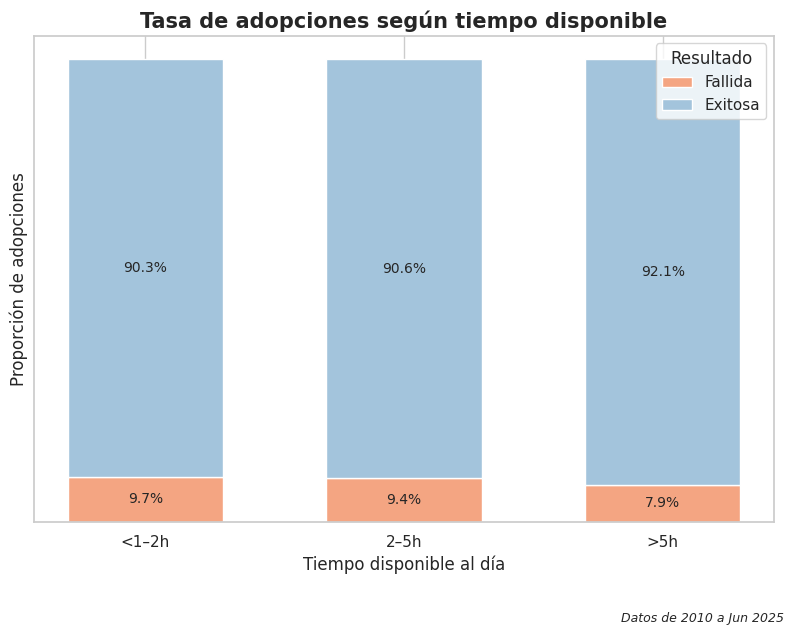

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Vista local: sólo adopciones y devoluciones sin 'otro'
df_plot = df[df['devuelto'].isin(['si','no'])].copy()
df_plot['Resultado'] = df_plot['devuelto'].map({'no': 'Exitosa', 'si': 'Fallida'})

# Orden lógico
orden_tiempo = ['<1–2h', '2–5h', '>5h']
df_plot['tiempo_norm'] = pd.Categorical(df_plot['tiempo_disponible'],
                                        categories=orden_tiempo,
                                        ordered=True)

# Tabla y proporciones
conteos = (pd.crosstab(df_plot['tiempo_norm'], df_plot['Resultado'])
             .reindex(orden_tiempo, fill_value=0))
for c in ['Fallida','Exitosa']:
    if c not in conteos.columns:
        conteos[c] = 0
conteos = conteos[['Fallida','Exitosa']]

proporciones = conteos.div(conteos.sum(axis=1).replace(0, np.nan), axis=0).fillna(0)

# Gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(8, 6))
x = np.arange(len(orden_tiempo))
bottom = np.zeros(len(orden_tiempo))
colores = {'Fallida': '#F4A582', 'Exitosa': '#A3C4DC'}

for res in ['Fallida','Exitosa']:
    vals = proporciones[res].values
    ax.bar(x, vals, 0.6, bottom=bottom, label=res, color=colores[res])
    for i, (b, v) in enumerate(zip(bottom, vals)):
        if v > 0:
            ax.text(x[i], b + v/2, f"{v*100:.1f}%", ha='center', va='center', fontsize=10)
    bottom += vals

# Ajustes
ax.set_xticks(x)
ax.set_xticklabels(orden_tiempo)
ax.set_xlabel("Tiempo disponible al día")
ax.set_ylabel("Proporción de adopciones")
ax.set_title("Tasa de adopciones según tiempo disponible", fontsize=15, weight='bold')
ax.legend(title="Resultado")
ax.set_yticks([])

plt.figtext(0.99, -0.05, "Datos de 2010 a Jun 2025", ha="right", fontsize=9, style='italic')
plt.tight_layout()
plt.savefig("tasa_adopciones_tiempo.png", dpi=150, bbox_inches="tight")
plt.show()

### 3.3. Horario laboral y adopciones exitosas

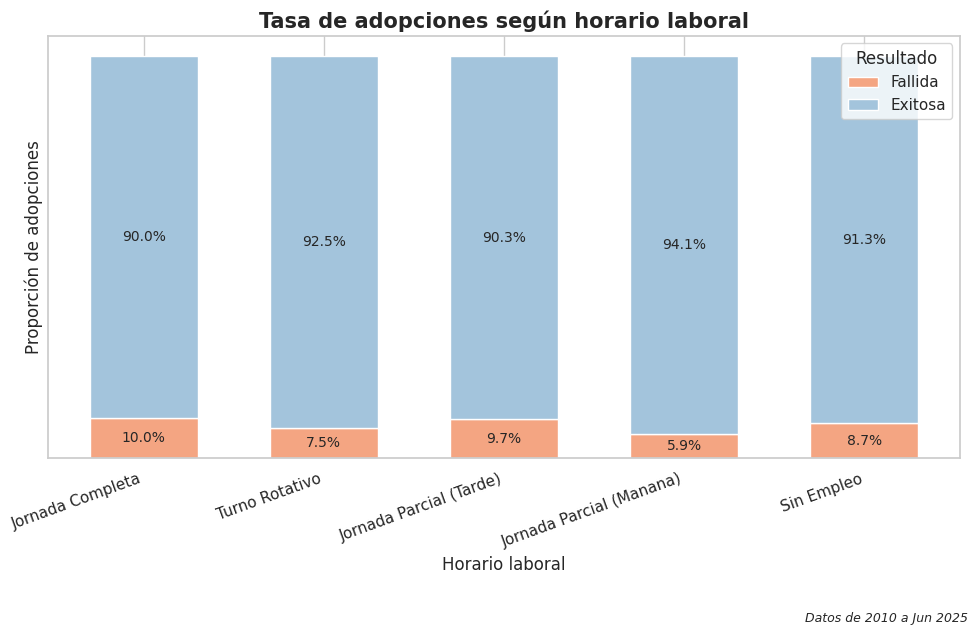

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Vista local: sólo adopciones y devoluciones sin 'otro'
df_plot = df[df['devuelto'].isin(['si','no'])].copy()
df_plot['Resultado'] = df_plot['devuelto'].map({'no': 'Exitosa', 'si': 'Fallida'})

# Orden de categorías
orden_horario = [
    'Jornada Completa',
    'Turno Rotativo',
    'Jornada Parcial (Tarde)',
    'Jornada Parcial (Manana)',
    'Sin Empleo'
]

df_plot['horario_norm'] = pd.Categorical(df_plot['horario_laboral'],
                                         categories=orden_horario,
                                         ordered=True)

# Tabla y proporciones
conteos = (pd.crosstab(df_plot['horario_norm'], df_plot['Resultado'])
             .reindex(orden_horario, fill_value=0))
for c in ['Fallida','Exitosa']:
    if c not in conteos.columns:
        conteos[c] = 0
conteos = conteos[['Fallida','Exitosa']]

proporciones = conteos.div(conteos.sum(axis=1).replace(0,np.nan), axis=0).fillna(0)

# Gráfico
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(orden_horario))
bottom = np.zeros(len(orden_horario))
colores = {'Fallida': '#F4A582', 'Exitosa': '#A3C4DC'}

for res in ['Fallida','Exitosa']:
    vals = proporciones[res].values
    ax.bar(x, vals, 0.6, bottom=bottom, label=res, color=colores[res])
    for i,(b,v) in enumerate(zip(bottom, vals)):
        if v > 0:
            ax.text(x[i], b+v/2, f"{v*100:.1f}%", ha='center', va='center', fontsize=10)
    bottom += vals

# Ajustes
ax.set_xticks(x)
ax.set_xticklabels(orden_horario, rotation=20, ha='right')
ax.set_xlabel("Horario laboral")
ax.set_ylabel("Proporción de adopciones")
ax.set_title("Tasa de adopciones según horario laboral", fontsize=15, weight='bold')
ax.legend(title="Resultado")
ax.set_yticks([])

plt.figtext(0.99, -0.05, "Datos de 2010 a Jun 2025", ha='right', fontsize=9, style='italic')
plt.tight_layout()
plt.savefig("tasa_adopciones_horario.png", dpi=150, bbox_inches="tight")
plt.show()

### 3.4. Relación entre tiempo disponible y tipo de animal (heatmap)

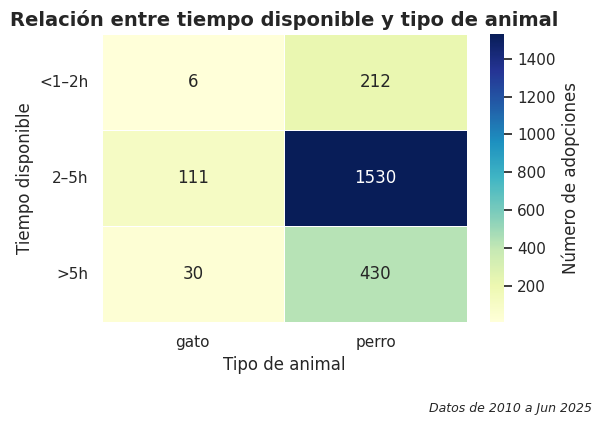

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Orden del tiempo
orden_tiempo = ['<1–2h', '2–5h', '>5h']

# Crosstab
tabla_heat = (pd.crosstab(df['tiempo_disponible'], df['tipo_animal'])
                .reindex(orden_tiempo, fill_value=0))

tabla_heat = tabla_heat.sort_index(axis=1)

# Dibujar el heatmap
plt.figure(figsize=(6, 4))
ax = sns.heatmap(
    tabla_heat,
    annot=True,
    fmt="d",
    cmap="YlGnBu",
    linewidths=0.5,
    cbar_kws={"label": "Número de adopciones"}
)

ax.set_xlabel("Tipo de animal")
ax.set_ylabel("Tiempo disponible")
ax.set_title("Relación entre tiempo disponible y tipo de animal", fontsize=14, weight='bold')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.figtext(0.99, -0.05, "Datos de 2010 a Jun 2025", ha="right", fontsize=9, style='italic')
plt.tight_layout()
plt.savefig("heatmap_tiempo_tipo.png", dpi=150, bbox_inches="tight")
plt.show()